<a href="https://colab.research.google.com/github/prashant0919/Codesoft-internship/blob/main/moviegenreclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


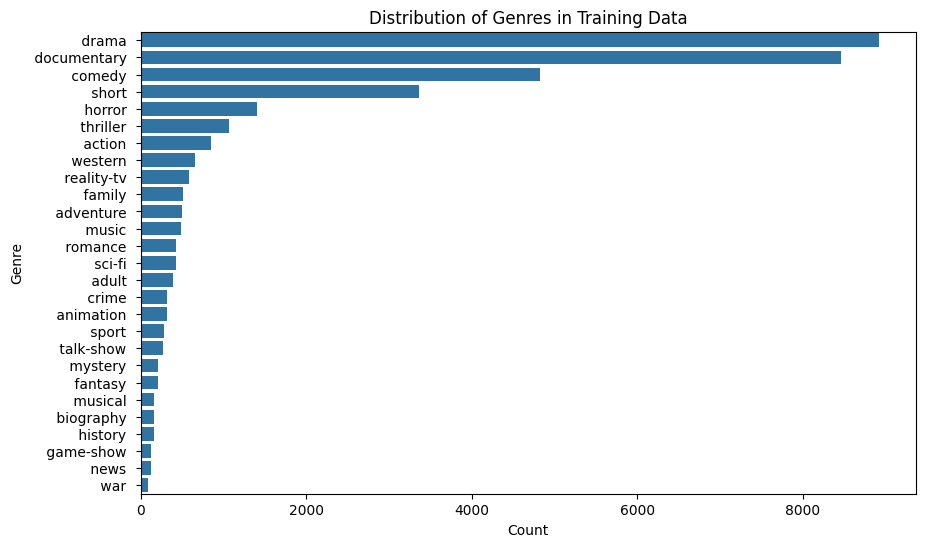

Naive Bayes Accuracy: 0.44420843953554234
Logistic Regression Accuracy: 0.5587652223166242


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
train_path= "train_data.txt"
train_data = pd.read_csv(train_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

# Load test dataset
test_path = "test_data.txt"
test_data = pd.read_csv(test_path, sep=":::", names=["ID","TITLE","DESCRIPTION"], engine="python")

# Define stemmer and stopwords
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))

# Define function for text cleaning
def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply text cleaning to train and test data
train_data["TextCleaning"] = train_data["DESCRIPTION"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(cleaning_data)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data["TextCleaning"])
X_test = vectorizer.transform(test_data["TextCleaning"])
y_train = train_data["GENRE"]

# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data Analysis and Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, y="GENRE", order=train_data["GENRE"].value_counts().index)
plt.title("Distribution of Genres in Training Data")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_val)
accuracy_nb = accuracy_score(y_val, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Train Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warning
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_val)
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)




In [9]:
# Take input from the user
print("Enter the movie details:")
title = input("Title: ")
description = input("Description: ")

# Preprocess the input data
cleaned_description = cleaning_data(description)

# Vectorize the input data using the trained TF-IDF vectorizer
X_input = vectorizer.transform([cleaned_description])

# Predict the genre using the trained classifiers
predicted_genre_nb = nb_classifier.predict(X_input)
predicted_genre_lr = lr_classifier.predict(X_input)

print("Predicted Genre (Naive Bayes):", predicted_genre_nb)
print("Predicted Genre (Logistic Regression):", predicted_genre_lr)


Enter the movie details:
Title: Night Call 
Description:  Simon's world is turned upside down when his little girl Katie is abducted during a family day out. After weeks of searching and appeals Simon decides to punish himself by offering a young prostitute with mounting debts, life changing money to end his life.
Predicted Genre (Naive Bayes): [' drama ']
Predicted Genre (Logistic Regression): [' drama ']
